In [55]:
conda install quandl

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [56]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [57]:
#we were asked to get an API key from making a quandl account in the task description so despite not having found relevant data there I'll leave the key to show I made the account
quandl.ApiConfig.api_key = 'te-1Y718MEsku5tyDaus'

In [58]:
path = r'C:\Users\Admin\Documents'

In [59]:
df = pd.read_csv(os.path.join(path, 'Feb 23 Gun Laws', 'Data', 'laws_crime_ratio.csv'), index_col = False)

In [60]:
df.describe()

Unnamed: 0.2  Unnamed: 0.1   Unnamed: 0  Violent crime total  \
count   2037.000000   2037.000000  2037.000000          2037.000000   
mean    1018.000000   1018.000000  1041.902798            91.162003   
std      588.175569    588.175569   610.406764           357.564655   
min        0.000000      0.000000     0.000000             0.000000   
25%      509.000000    509.000000   515.000000             6.000000   
50%     1018.000000   1018.000000  1040.000000            20.000000   
75%     1527.000000   1527.000000  1554.000000            56.000000   
max     2036.000000   2036.000000  2160.000000          7329.000000   

       Murder/NNMS         Rape      Robbery  Aggravated assault  \
count  2037.000000  2037.000000  2037.000000         2037.000000   
mean      1.262641    11.977418    12.819342           65.102602   
std       5.070354    36.657664    88.854137          235.542370   
min       0.000000     0.000000     0.000000            0.000000   
25%       0.000000     1.000000     0.000000            4.000000   
50%       0.000000     3.000000     0.000000           14.000000   
75%       1.000000    10.000000     3.000000           41.000000   
max      97.000000   860.000000  2249.000000         4123.000000   

       Property crime total     Burglary  ...  REGISTRATION    UNIVERSAL  \
count           2037.000000  2037.000000  ...   2037.000000  2037.000000   
mean             487.190476   100.902798  ...      0.000491     0.123220   
std             1827.050567   282.219639  ...      0.022157     0.328771   
min                0.000000     0.000000  ...      0.000000     0.000000   
25%               37.000000    10.000000  ...      0.000000     0.000000   
50%              111.000000    31.000000  ...      0.000000     0.000000   
75%              304.000000    86.000000  ...      0.000000     0.000000   
max            42526.000000  7044.000000  ...      1.000000     1.000000   

           ASSAULT   OPENCARRYH  OPENCARRYPERMITH  PERMITCONCEALED  \
count  2037.000000  2037.000000       2037.000000      2037.000000   
mean      0.067256     0.074129          0.448699         0.726559   
std       0.250526     0.262044          0.497483         0.445835   
min       0.000000     0.000000          0.000000         0.000000   
25%       0.000000     0.000000          0.000000         0.000000   
50%       0.000000     0.000000          0.000000         1.000000   
75%       0.000000     0.000000          1.000000         1.000000   
max       1.000000     1.000000          1.000000         1.000000   

             NOSYG     LAWTOTAL    Population  Violent crime rate  
count  2037.000000  2037.000000  2.037000e+03         2037.000000  
mean      0.332842    24.386843  1.112561e+05            0.001074  
std       0.471346    23.263790  3.699651e+05            0.001487  
min       0.000000     1.000000  4.040000e+02            0.000000  
25%       0.000000     8.000000  1.208300e+04            0.000289  
50%       0.000000    18.000000  2.691400e+04            0.000672  
75%       1.000000    30.000000  7.107000e+04            0.001395  
max       1.000000   111.000000  1.003911e+07            0.039843  

[8 rows x 27 columns]

In [61]:
#for our time series, let's look at a state that is close to the middle in terms of number of gun laws
#We might be able to see changes in crime rate as different laws change
df_mid = df[df['LAWTOTAL'] == 18]

In [62]:
df_mid['State'].value_counts()

Texas            202
West Virginia     31
Name: State, dtype: int64

In [127]:
#this is awesome because I'm from Texas! My state recently enacted constitutional carry and there were a few other law changes in recent years, so we can look at how crime rates may have correlated
#the crime data in Texas is also very complete according to the FBI's website
#I found some monthly data on gun sales going back the last decade for the state of Texas based on a few different metrics but primarily the backrgound checks. The methodology looked comprehensive so for this task I think it'll be okay
df_tx = pd.read_csv(os.path.join(path, 'Feb 23 Gun Laws', 'Data', 'gun sales data.csv'), index_col = False)

In [128]:
df_tx.head(10)

Date  Estimated Gun Sales
0   October 2012                98597
1  November 2012               136129
2  December 2012               227567
3   January 2013               167797
4  February 2013               152440
5     March 2013               130901
6     April 2013               101930
7       May 2013                89715
8      June 2013                77734
9      July 2013                78968

# Making our charts

In [129]:
#so I can make the syntax to where the date only shows the year and month, but then it won't make the first line chart. why would this be?
df_tx['Date'] = pd.to_datetime(df_tx['Date'])

In [130]:
df_tx.head()

Date  Estimated Gun Sales
0 2012-10-01                98597
1 2012-11-01               136129
2 2012-12-01               227567
3 2013-01-01               167797
4 2013-02-01               152440

In [131]:
from datetime import datetime

df_tx = df_tx.set_index('Date')
df_tx.head()

Estimated Gun Sales
Date                           
2012-10-01                98597
2012-11-01               136129
2012-12-01               227567
2013-01-01               167797
2013-02-01               152440

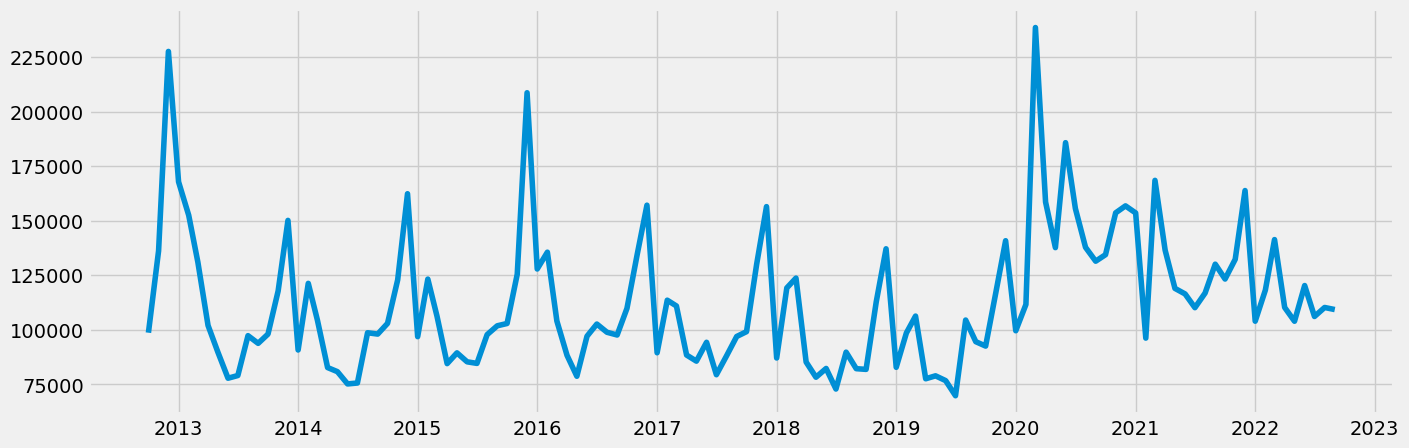

In [132]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_tx)

In [136]:
decomposition = sm.tsa.seasonal_decompose(df_tx, model='additive')

In [137]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

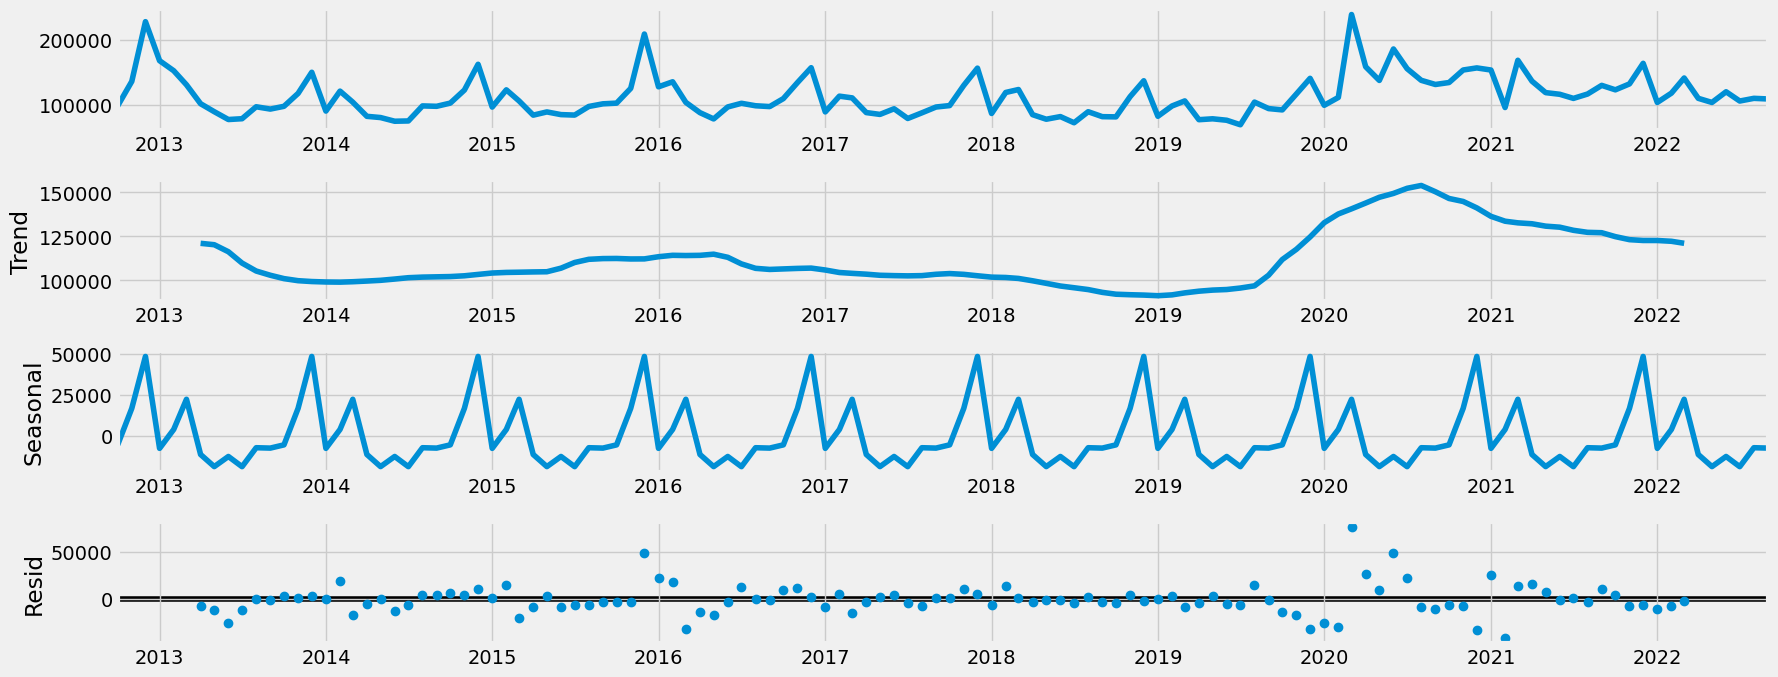

In [138]:
decomposition.plot()
plt.show()

okay so pretty cool, we have a pretty stable number of gun sales until about the time when open carry became legal in the state for permit holders (2016), then a downward trend until they went way up at the end of 2019 and through mid-2020 (I imagine due to Covid and the threat of stricter gun laws with the most recent presidential election). Interestingly, the trend looks to go generally downward after constitutional carry went into effect, though this may be because more people are buying guns privately which doesn't require a background check and thus is hard to capture in the data. You can see there's seasonality in that sales are the highest at the end of the year (so probably Christmas) and again towards the springtime (maybe hunting season or other farmland purposes). W/r/t the residual noise, the only thing we can see is that 2020 spike, which I would guess is due to the political climate. In any case, we can see it's definitely a non-stationary series.

# Testing for stationarity

In [140]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_tx['Estimated Gun Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.989595
p-value                          0.291154
Number of Lags Used             12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


Critical value smaller than test statistic...cannot reject null hypothesis, so not stationary data

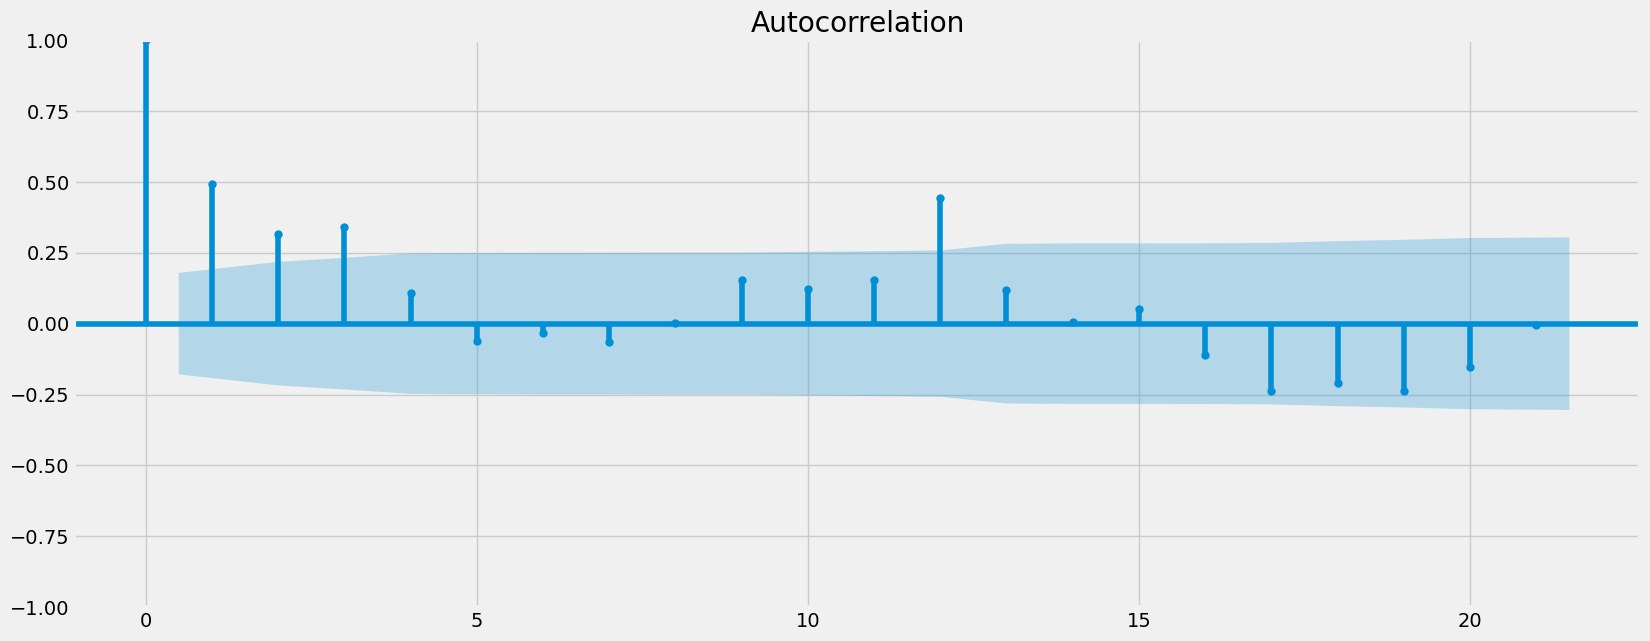

In [141]:
#now for our autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_tx)
plt.show()

# Forcing the data to be stationary

In [142]:
df_diff = df_tx - df_tx.shift(1)

In [144]:
#gotta remove missing values
df_diff.dropna(inplace = True)

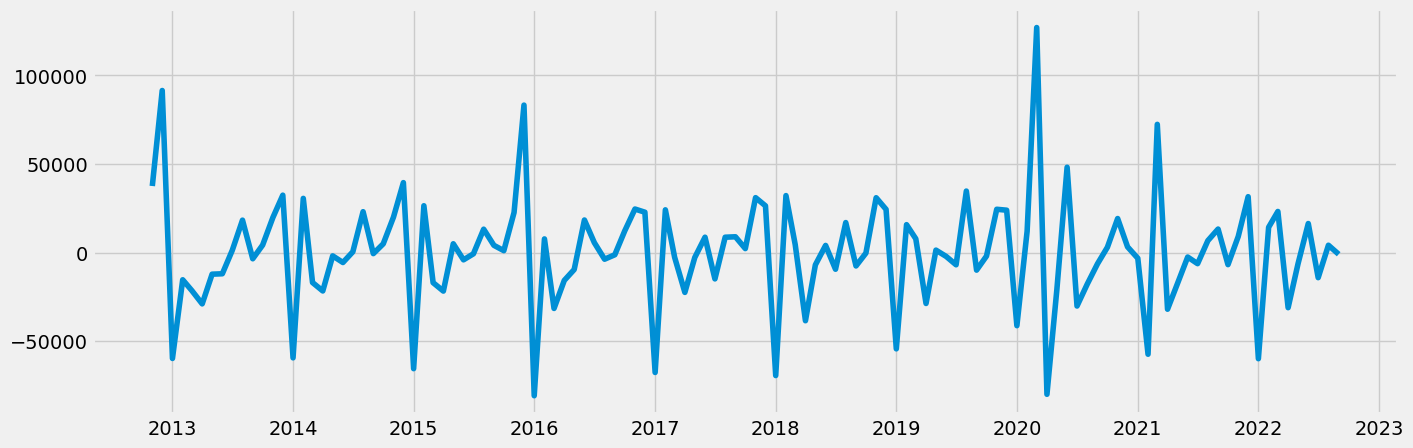

In [146]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [147]:
#okay it still looks raggedy but it does look way more stationary. let's test it out. 
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.765486
p-value                          0.003281
Number of Lags Used             11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


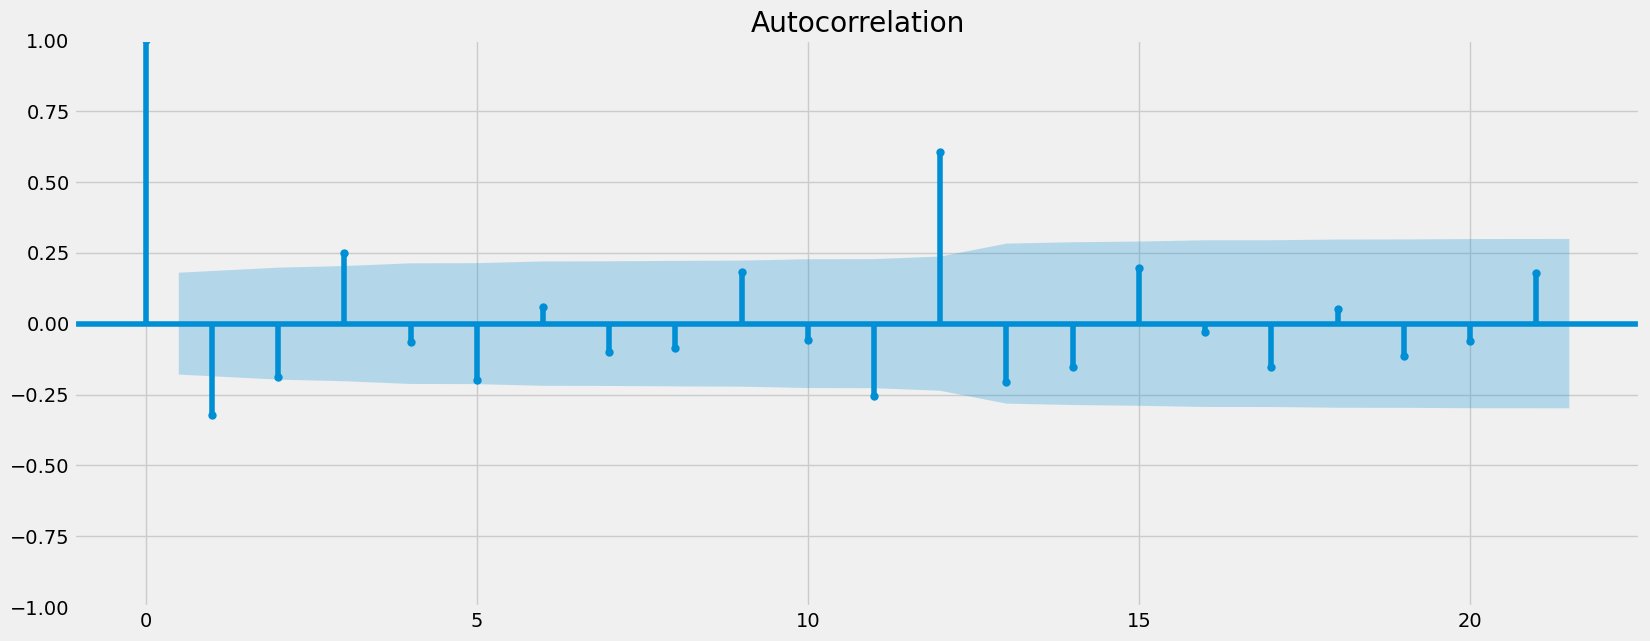

In [148]:
#success! But let's look at the autocorrelation
plot_acf(df_diff)
plt.show()

hey that looks pretty okay!